In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df = pd.read_csv('medical_examination.csv')

In [6]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
df.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
# Calculating overweight with the BMI
bmi = df['weight'] / pow((df['height'] / 100), 2)
df['overweight'] = bmi

df.loc[bmi <= 25, 'overweight'] = 0
df.loc[bmi > 25, 'overweight'] = 1

df['overweight']

0        0.0
1        1.0
2        0.0
3        1.0
4        0.0
        ... 
69995    1.0
69996    1.0
69997    1.0
69998    1.0
69999    0.0
Name: overweight, Length: 70000, dtype: float64

In [4]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

df['cholesterol']

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [5]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

df['gluc']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64

In [6]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [27]:
# Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
df_cat = pd.melt(df, id_vars ='cardio', value_vars =['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke']) 

df_cat

,cardio,variable,value
0,0,active,1.0
1,1,active,1.0
2,1,active,0.0
3,1,active,1.0
4,0,active,0.0
...,...,...,...
419995,0,smoke,1.0
419996,1,smoke,0.0
419997,1,smoke,0.0
419998,1,smoke,0.0


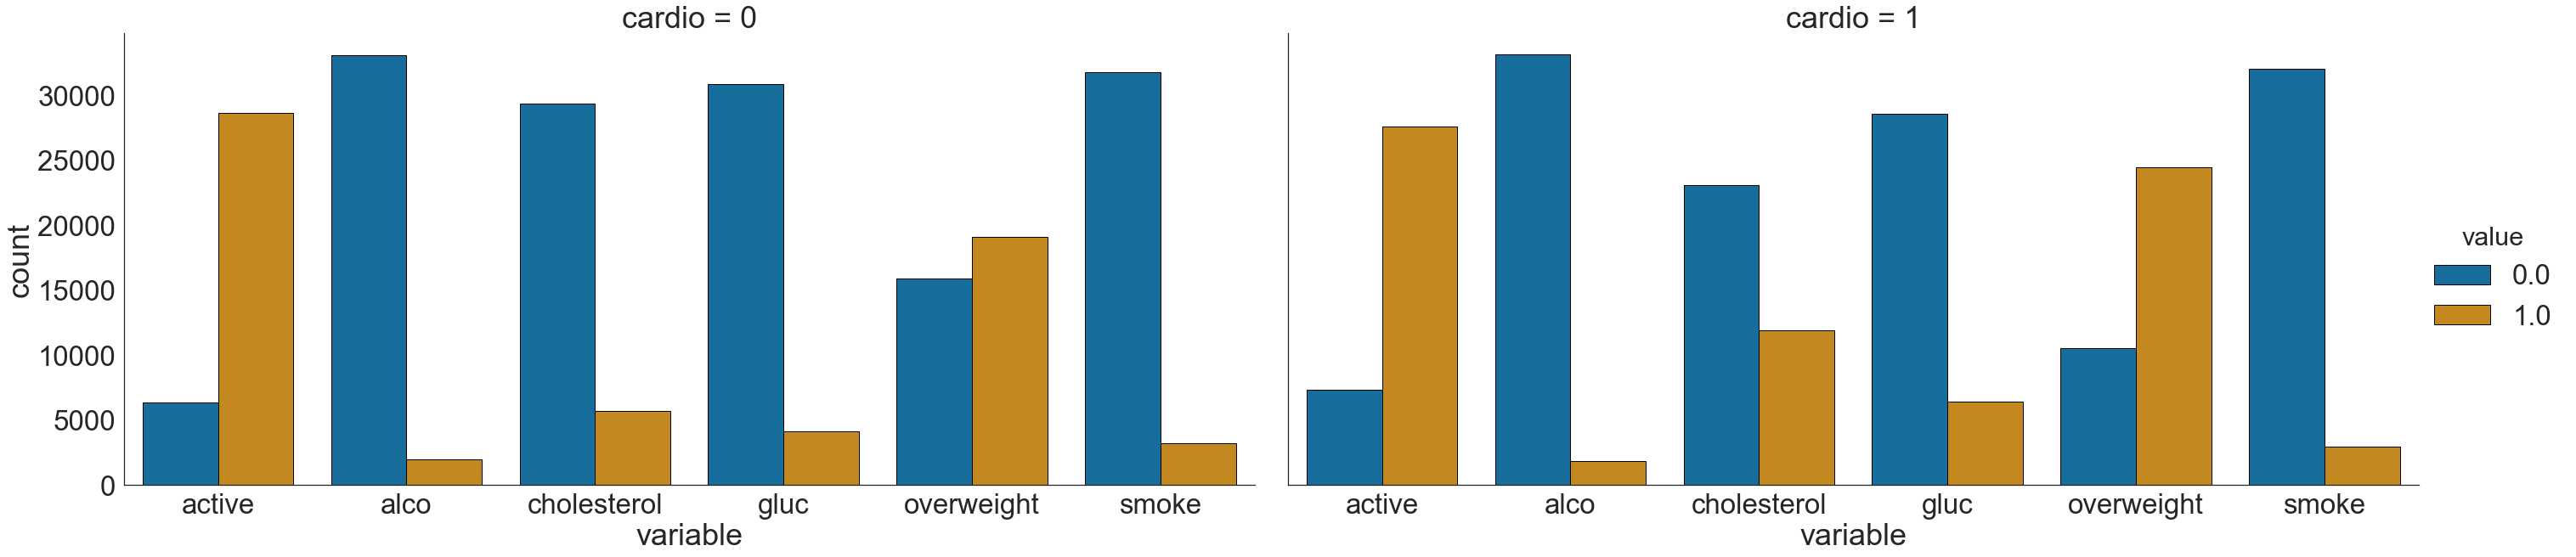

In [37]:
sns.set(font_scale=3)
sns.set_style("white")
fig = sns.catplot(x='variable',
        hue='value',
        kind='count',
        palette='colorblind',
        col='cardio',
        edgecolor='.01',
        data=df_cat,
        height=10,
        aspect=2)

fig

In [28]:
df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= (df['height'].quantile(0.025))) &
    (df['height'] <= (df['height'].quantile(0.975))) &
    (df['weight'] >= (df['weight'].quantile(0.025))) &
    (df['weight'] <= (df['weight'].quantile(0.975)))]

df_heat.set_index('id')

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0


In [30]:
corr = df_heat.corr()

In [31]:
mask = np.triu(corr)

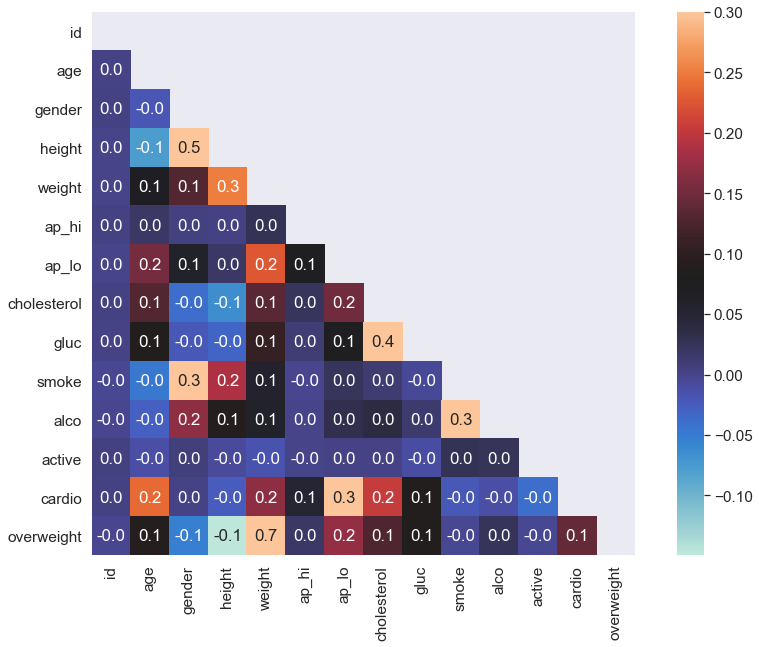

In [33]:
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True
#sns.axes_style("white")
#p2 = sns.heatmap(corr, mask=mask, square=True)
fig, ax = plt.subplots(figsize=(15,10))
sns.set(font_scale=1.4)
sns.heatmap(corr, vmax=.30, center=0.08, annot=True, fmt='.1f', cbar=True, square=True, mask=mask)